<a href="https://colab.research.google.com/github/finaorivia19/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nomor 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

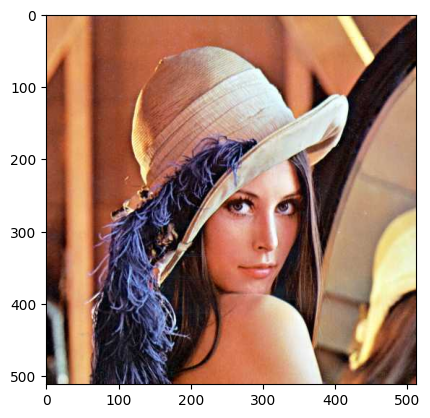

In [6]:
#Input image
image = cv.imread('/content/drive/MyDrive/image/lena.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image);

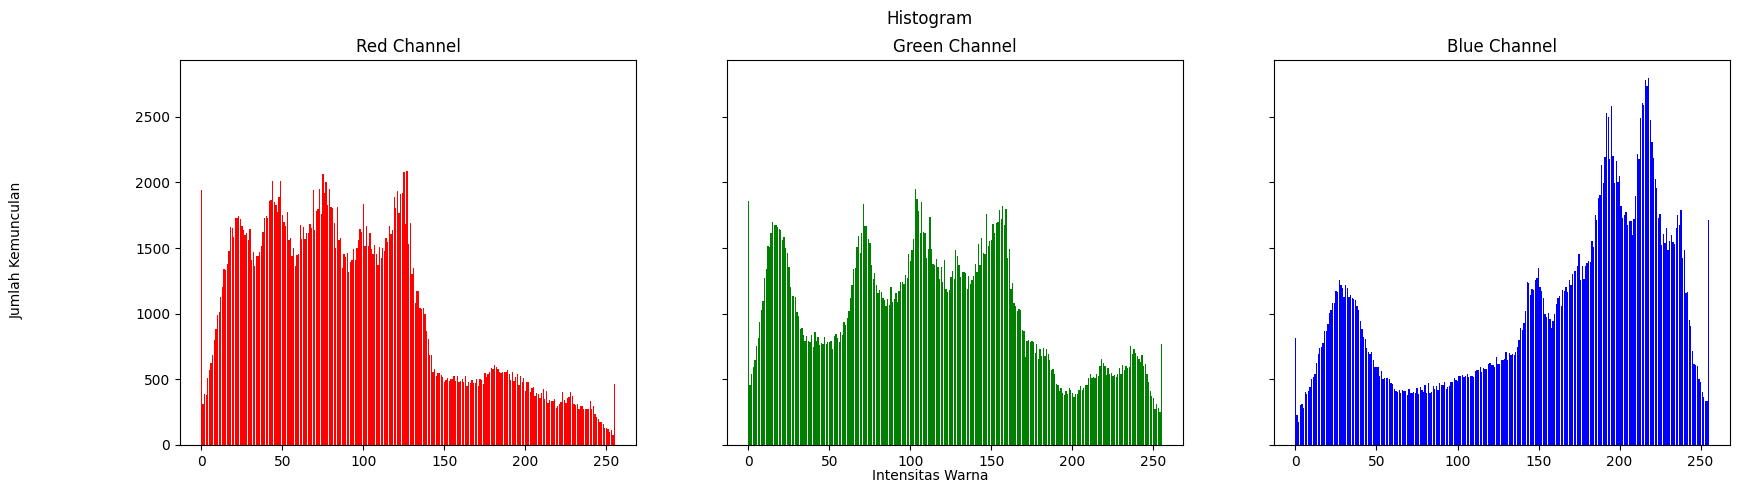

In [7]:
# Melakukan pengambilan dimensi citra
height, width, depth = np.shape(image) #mendapatkan tinggi (height), lebar (width), dan kedalaman (depth) citra.

# Inisialisasi array untuk menyimpan jumlah kemunculan intensitas warna
histogram_red = np.zeros(256)  #inisialisasi 3 array numpy,untuk menyimpan jumlah kemunculan intensitas warna dalam masing-masing saluran warna.
histogram_green = np.zeros(256)
histogram_blue = np.zeros(256)

# Melakukan perulangan untuk setiap piksel, kemudian di masukkan kedalam masing-masing histogram
for h in range(height):
    for i in range(width):
        r, g, b = image[h, i]
        histogram_red[r] += 1
        histogram_green[g] += 1
        histogram_blue[b] += 1
#didalam perulangan diatas mendapatkan nilai intensitas merah (r), hijau (g), dan biru (b) dari piksel yang sedang diproses.
#meningkatkan jumlah kemunculan intensitas warna yang sesuai dalam masing-masing saluran warna dengan cara menambahkan 1 pada indeks yang sesuai dalam array histogram
#membuat tiga subplot dalam satu gambar menggunakan Matplotlib. Setiap subplot akan menampilkan histogram untuk masing-masing saluran warna.
# Membuat histogram untuk masing-masing saluran warna

fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True) #untuk membuat histogram batang dalam subplot pertama, kedua, dan ketiga masing-masing.
fig.suptitle('Histogram')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
fig.text(0.04, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')

axs[0].bar(range(256), histogram_red.flatten(), color='red')
axs[0].set_title('Red Channel')

axs[1].bar(range(256), histogram_green.flatten(), color='green')
axs[1].set_title('Green Channel')

axs[2].bar(range(256), histogram_blue.flatten(), color='blue')
axs[2].set_title('Blue Channel')

plt.show()

Nomor 4 Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

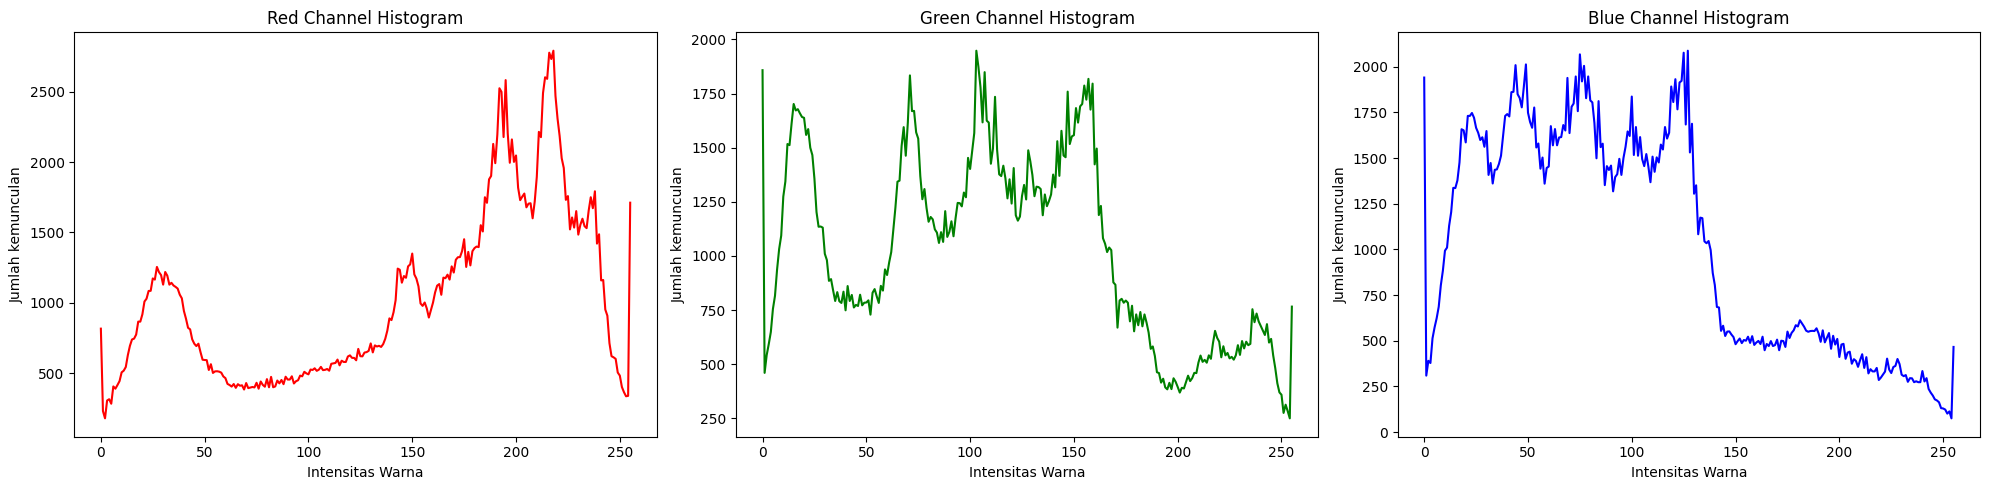

In [8]:
# Mendefinisikan tiap saluran warna
colors = ("r", "g", "b")
channel_id = (0, 1, 2) #Tuple yang berisi tiga nilai (0, 1, 2) yang mengidentifikasi saluran warna (0 untuk merah, 1 untuk hijau, 2 untuk biru) dalam citra.
channel_names = ('Red', 'Green', 'Blue') #Tuple yang berisi tiga nama saluran warna (Red, Green, Blue) yang akan digunakan dalam judul plot histogram.

# Mengatur ukuran pada setiap plot
plt.figure(figsize=(20, 5)) #tinggi dan lebar

# Membuat Histogram dengan tiap warna saluran
for i, (c, channel_name) in enumerate(zip(colors, channel_names), 1):
    plt.subplot(1, 3, i) #untuk membuat tiga subplot (sebuah baris dan tiga kolom) untuk histogram masing-masing saluran warna.
    #Variabel i digunakan untuk mengidentifikasi subplot yang sedang digambar.
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id[i - 1]], bins=256, range=(0, 256)
    )
    #menghasilkan 2 array histogram, bin_edges berisi batas bin histogram.
# Membuat histogram dengan garis dan sumbu x dan y
    plt.plot(bin_edges[0:-1], histogram, color=c) #sebagai sumbu x (intensitas warna) dan histogram sebagai sumbu y (jumlah kemunculan)
    plt.xlabel("Intensitas Warna")
    plt.ylabel("Jumlah kemunculan")
    plt.title(f"{channel_name} Channel Histogram")

plt.tight_layout()
plt.show()

Nomor 5

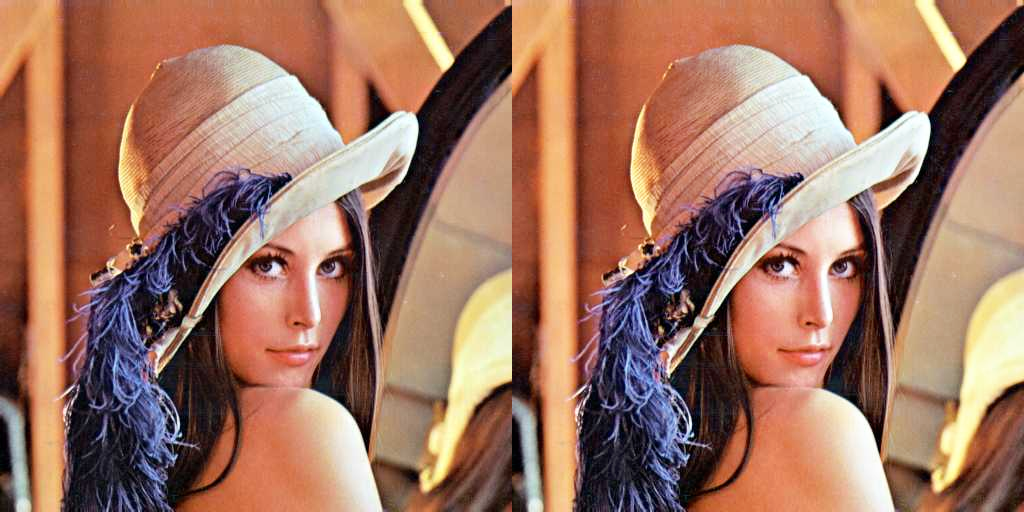

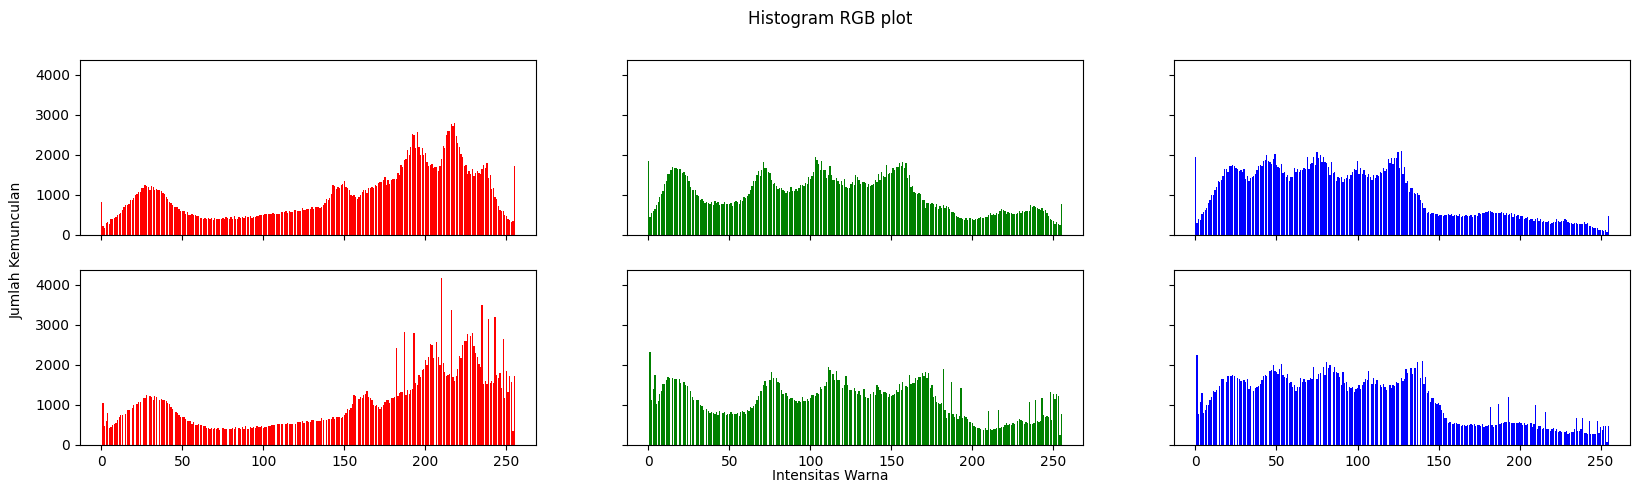

In [11]:
# 5. Membuat histogram citra seperti output histogram equalization
image = cv.imread('/content/drive/MyDrive/image/lena.jpg')
def histog(image):
  height, width, depth = np.shape(image)
  xy = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      xy[0][image[y][x][0]] += 1
      xy[1][image[y][x][1]] += 1
      xy[2][image[y][x][2]] += 1
  return xy

histo_asli = histog(image)

#convert to Numpy array
img_array = np.asarray(image)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((image, img2)) #concatenate image
cv2_imshow(final_frame)

# Membuat array 'names' yang berisi nilai dari 0 hingga 255
names = np.arange(256)

# Memeriksa apakah gambar adalah gambar grayscale
isgrayimg = np.array_equal(histo_asli[0], histo_asli[1]) and np.array_equal(histo_asli[1], histo_asli[2])

# Menampilkan plot histogram sesuai dengan jenis gambar (grayscale atau warna)
if not isgrayimg:
    # Gambar berwarna
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    # Gambar grayscale
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[2], color='gray')
    axs[1].bar(names, equal_histo[2], color='gray')

Nomor 6

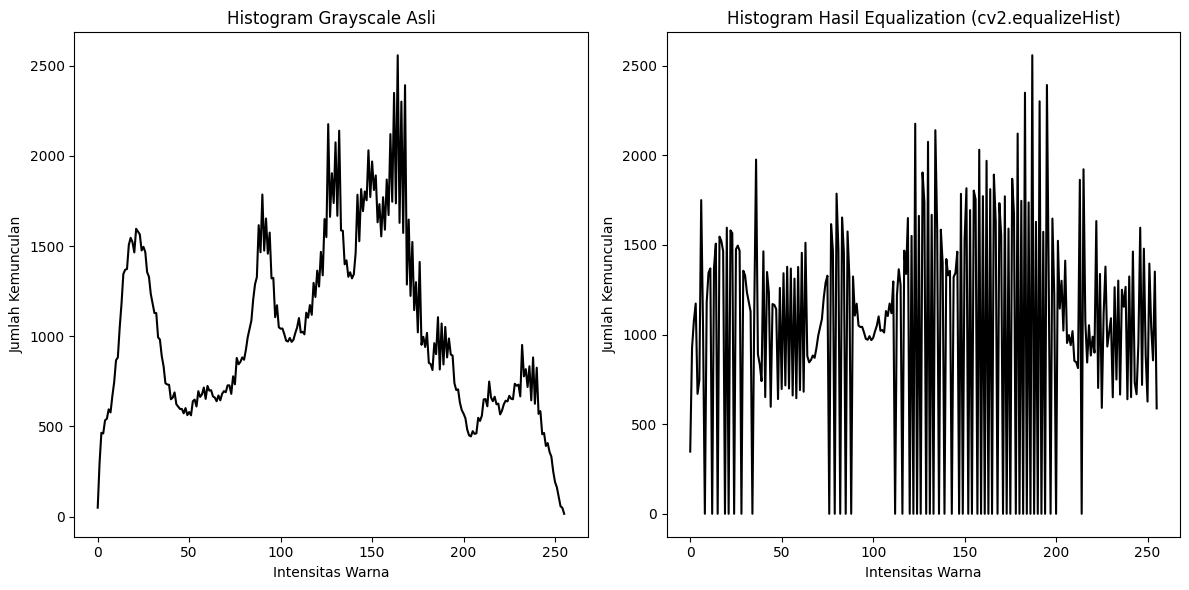

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra asli
image = cv2.imread('/content/drive/MyDrive/image/lena.jpg')

# Ubah citra ke dalam mode grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Terapkan histogram equalization menggunakan cv2.equalizeHist
equalized_image = cv2.equalizeHist(gray_image)

# Hitung histogram citra grayscale asli
histo_asli = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Hitung histogram citra hasil equalization
histo_equalized_cv2 = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan plot histogram
plt.figure(figsize=(12, 6))

# Plot histogram citra grayscale asli
plt.subplot(1, 2, 1)
plt.plot(histo_asli, color='black')
plt.title('Histogram Grayscale Asli')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Plot histogram citra hasil equalization menggunakan cv2.equalizeHist
plt.subplot(1, 2, 2)
plt.plot(histo_equalized_cv2, color='black')
plt.title('Histogram Hasil Equalization (cv2.equalizeHist)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()

Hasil histogram equalization yang diperoleh dari cv2.equalizeHist memiliki perbedaan kecil dalam penampilan yang disebabkan oleh perbedaan dalam algoritma yang digunakan oleh cv2.equalizeHist. Namun, kedua metode tersebut masih menghasilkan perbaikan yang signifikan dalam distribusi intensitas warna citra.

Nomor 7

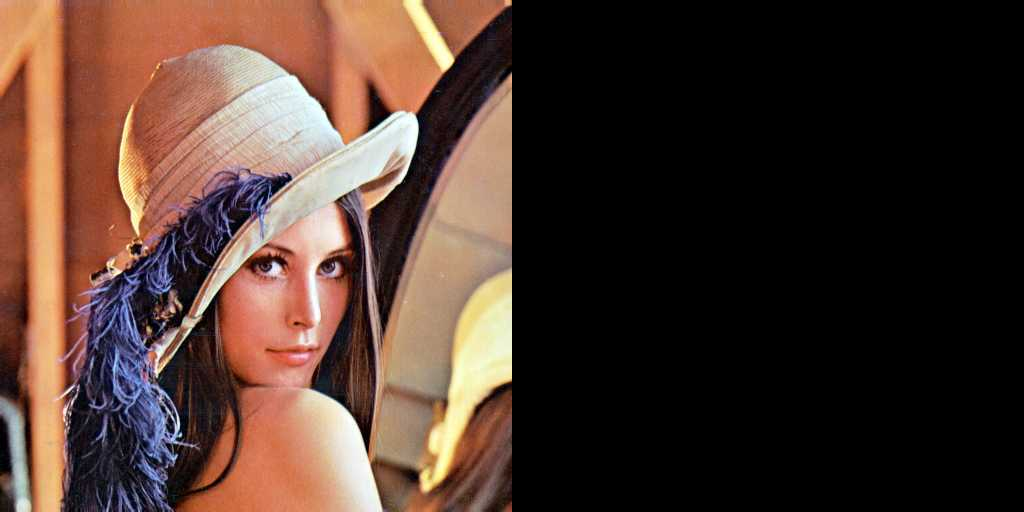

In [14]:
img_1 = cv.imread('/content/drive/MyDrive/image/lena.jpg')
# Fungsi 'warnaTerdekat' digunakan untuk mencari warna terdekat dalam palet warna yang diberikan.
def warnaTerdekat(r, g, b):
    pValue = 0
    minDistance = 255*255 + 255*255 + 255*255 + 1  # Inisialisasi jarak minimum dengan nilai maksimum.
    warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]  # Palet warna yang tersedia.

    # Iterasi melalui semua warna dalam palet.
    for i in range(len(warnaPallette)):
        rDiff = r - warnaPallette[i][0]
        gDiff = g - warnaPallette[i][1]
        bDiff = b - warnaPallette[i][2]
    # Menghitung jarak Euclidean antara warna yang diberikan dan warna dalam palet.
        distance = rDiff * rDiff + gDiff * gDiff + bDiff * bDiff
    # Jika jarak yang dihitung lebih kecil dari jarak minimum yang saat ini ditemukan,
    # perbarui nilai jarak minimum dan indeks warna terdekat (pValue).
        if distance < minDistance:
            minDistance = distance
            pValue = i
        return pValue

# Palet warna yang tersedia.
warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]

# Mengubah format warna gambar 'img_1' dari BGR ke RGB.
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Membuat gambar kosong dengan format yang sama seperti 'img_16'.
img_8 = np.zeros(img_16.shape, img_16.dtype)

# Iterasi melalui setiap piksel dalam gambar 'img_16'.
for y in range(0, img_16.shape[0]):
    for x in range(0, img_16.shape[1]):
        # Mencari warna terdekat dari palet untuk setiap piksel dan menggantinya dalam gambar 'img_8'.
        baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
        img_8[y, x] = warnaPallette[baru]

# Mengembalikan gambar 'img_16' ke format BGR dan 'img_8' ke format RGB.
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)


# Menggabungkan gambar 'img_16' dan 'img_8' secara horizontal.
final_frame = cv.hconcat((img_16, img_8))

# Menampilkan gambar final yang berisi gambar asli dan gambar dengan palet warna terdekat.
cv2_imshow(final_frame)

Nomor 8

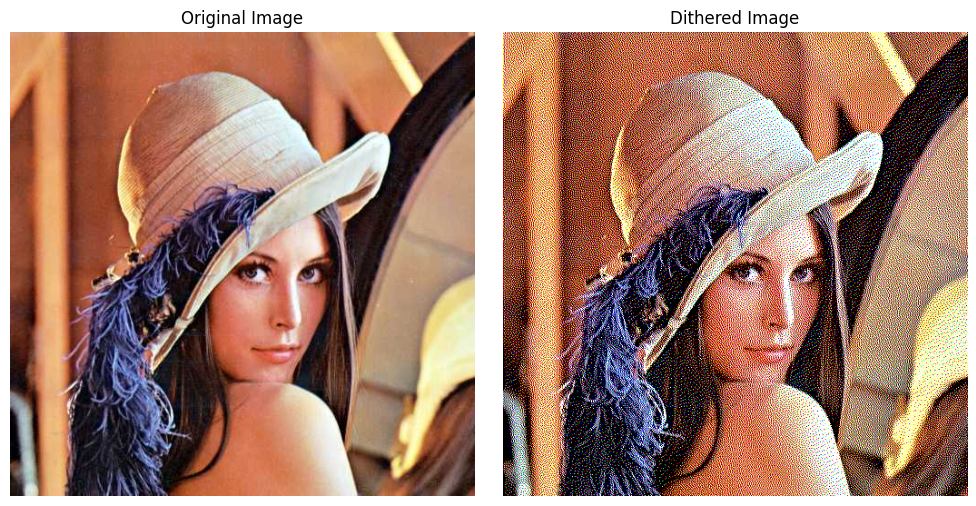

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)
    return image

def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    if x - 1 >= 0 and y + 1 < height:
        new_pixel = image.getpixel((x - 1, y + 1))
        image.putpixel((x - 1, y + 1), (
            new_pixel[0] + (error_r * 3 // 16),
            new_pixel[1] + (error_g * 3 // 16),
            new_pixel[2] + (error_b * 3 // 16)
        ))
    if y + 1 < height:
        new_pixel = image.getpixel((x, y + 1))
        image.putpixel((x, y + 1), (
            new_pixel[0] + (error_r * 5 // 16),
            new_pixel[1] + (error_g * 5 // 16),
            new_pixel[2] + (error_b * 5 // 16)
        ))
    if x + 1 < width and y + 1 < height:
        new_pixel = image.getpixel((x + 1, y + 1))
        image.putpixel((x + 1, y + 1), (
            new_pixel[0] + (error_r * 1 // 16),
            new_pixel[1] + (error_g * 1 // 16),
            new_pixel[2] + (error_b * 1 // 16)
        ))

input_image_path = "/content/drive/MyDrive/image/lena.jpg"
input_image = Image.open(input_image_path)

output_image = apply_dithering(input_image)

plt.figure(figsize=(10, 5))

# Memanggil Citra Original
plt.subplot(1, 2, 1)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Menampilkan Dithered
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Menampilkan citra
plt.tight_layout()
plt.show()

Nomor 9

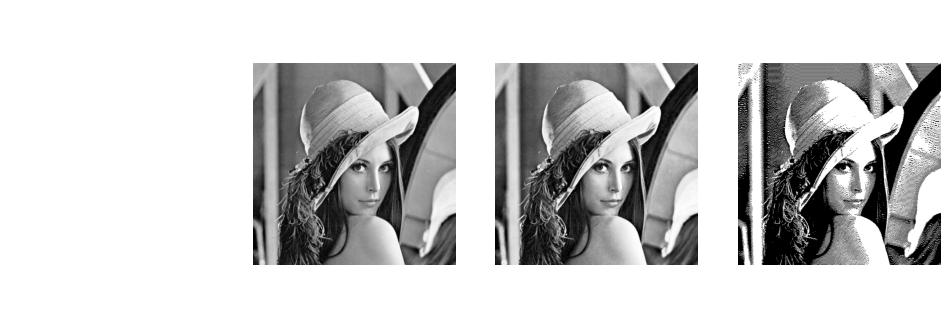

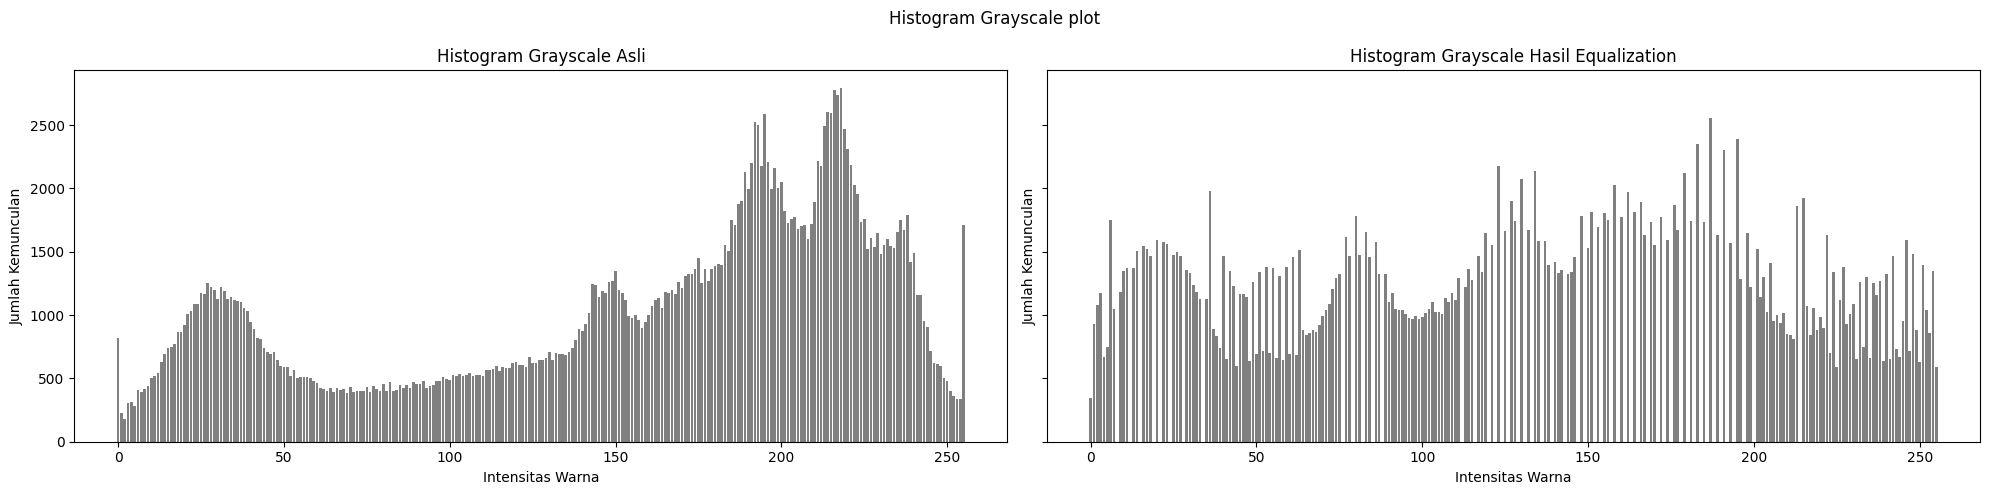

In [19]:
from cv2.gapi import equalizeHist
imgx = cv.imread('/content/drive/MyDrive/image/lena.jpg')
grayimg = cv.cvtColor(imgx, cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(grayimg.copy())
def floyd_steinberg_dithering(dx):
    height, width = dx.shape
    for y in range(height):
        for x in range(width):
            old_pixel = dx[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            dx[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x > 0 and y < height - 1:
                dx[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                dx[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                dx[y + 1, x + 1] += error * 1 / 16

    return dx
dithered = floyd_steinberg_dithering(equ.copy())

# Menampilkan gambar

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[1].imshow(cv.cvtColor(grayimg, cv.COLOR_BGR2RGB))
axes[2].imshow(cv.cvtColor(equ, cv.COLOR_BGR2RGB))
axes[3].imshow(cv.cvtColor(dithered, cv.COLOR_BGR2RGB))

for ax in axes:
    ax.axis('off')

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot', y=0.98)  # Menentukan letak judul di atas plot

# Tampilkan histogram grayscale asli
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[0].set_title('Histogram Grayscale Asli')
axs[0].set_xlabel('Intensitas Warna')
axs[0].set_ylabel('Jumlah Kemunculan')

# Tampilkan histogram grayscale hasil equalization
axs[1].bar(range(256), histo_equalized[:,0], color='gray')
axs[1].set_title('Histogram Grayscale Hasil Equalization')
axs[1].set_xlabel('Intensitas Warna')
axs[1].set_ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()
